# Connecting To drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'Colab Notebooks'      'Internship-Aug2020-Gowtham R.pdf'   Photos
'Getting started.pdf'  'My Drive'			   'Pongal 2021'


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project

/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project


In [ ]:
#!pip install plotly
#!pip install keras-tuner


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
from datetime import datetime , date

from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.model_selection import RandomizedSearchCV,KFold

# Global Static Variable

In [ ]:
fields = ['Date','High','Low','Open','Close']
lookback = 30

prediction_date = pd.Timestamp(2020,11,30,00,00,00)

In [ ]:
df = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/Data/NIFTY50/ADANIPORTS.csv",usecols = fields)
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Open,High,Low,Close
0,2007-11-27,770.00,1050.00,770.0,962.90
1,2007-11-28,984.00,990.00,874.0,893.90
2,2007-11-29,909.00,914.75,841.0,884.20
3,2007-11-30,890.00,958.00,890.0,921.55
4,2007-12-03,939.75,995.00,922.0,969.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3220 non-null   datetime64[ns]
 1   Open    3220 non-null   float64       
 2   High    3220 non-null   float64       
 3   Low     3220 non-null   float64       
 4   Close   3220 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 125.9 KB


In [ ]:
df.dropna(axis=0)
df.describe()

,Open,High,Low,Close
count,3220.000000,3220.000000,3220.000000,3220.000000
mean,336.308416,342.948602,329.266522,335.710870
std,189.505197,194.402086,184.660834,188.876554
min,108.000000,110.450000,105.650000,108.000000
25%,161.800000,164.225000,158.900000,161.237500
50%,321.650000,326.500000,315.050000,320.300000
75%,392.000000,397.525000,386.000000,391.600000
max,1310.250000,1324.000000,1270.000000,1307.450000


In [ ]:
def plotCandleStick(df):
    fig = go.Figure(data=(go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])))
    #fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()

In [ ]:
plotCandleStick(df[0:25])

In [ ]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y) 

In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [ ]:
high_X ,high_y = convert2matrix(df['High'],30) 

In [ ]:
high_X_train, high_X_test , high_y_train , high_y_test = train_test_split(high_X,high_y,test_size=0.2)

# DNN Model  High value prediction

In [ ]:
model1 = Sequential()

model1.add(Dense(1000,input_shape=(lookback,),activation='relu'))
model1.add(Dense(500,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.c

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              31000     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                25050     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 556,601
Trainable params: 556,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [ ]:
callback = EarlyStopping(monitor='val_loss',patience = 5)

In [ ]:
history1 = model1.fit(high_X_train,high_y_train,validation_split=0.2,epochs = 100,callbacks = [callback])

Epoch 1/100
64/64 [==============================] - 2s 18ms/step - loss: 12127.2833 - mae: 61.4586 - val_loss: 1180.7667 - val_mae: 22.3367
Epoch 2/100
64/64 [==============================] - 1s 12ms/step - loss: 735.6117 - mae: 16.2509 - val_loss: 357.1110 - val_mae: 10.4303
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 366.0625 - mae: 11.2354 - val_loss: 2565.0769 - val_mae: 43.2333
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 892.8810 - mae: 21.1674 - val_loss: 1309.6550 - val_mae: 29.8000
Epoch 5/100
64/64 [==============================] - 1s 13ms/step - loss: 681.2081 - mae: 17.5612 - val_loss: 795.0065 - val_mae: 22.6052
Epoch 6/100
64/64 [==============================] - 1s 12ms/step - loss: 419.6297 - mae: 11.3255 - val_loss: 1246.0126 - val_mae: 29.7040
Epoch 7/100
64/64 [==============================] - 1s 13ms/step - loss: 445.7116 - mae: 12.0953 - val_loss: 176.5694 - val_mae: 7.7684
Epoch 8/100
64/64 [==========

In [ ]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()

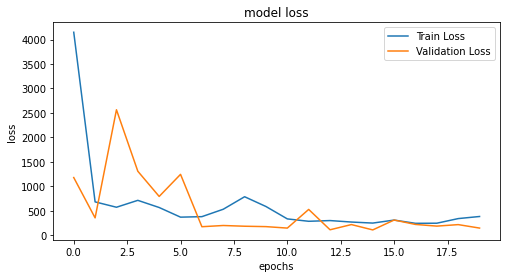

In [ ]:
model_loss(history1)

In [ ]:
def prediction_plot(y_test, test_predict):
      len_prediction=[x for x in range(len(y_test))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, y_test, marker='.', label="actual")
      plt.plot(len_prediction, test_predict, 'r', label="prediction")
      plt.tight_layout()
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Stock Value', size=15)
      plt.xlabel('Prediction number', size=15)
      plt.legend(fontsize=15)
      plt.show()


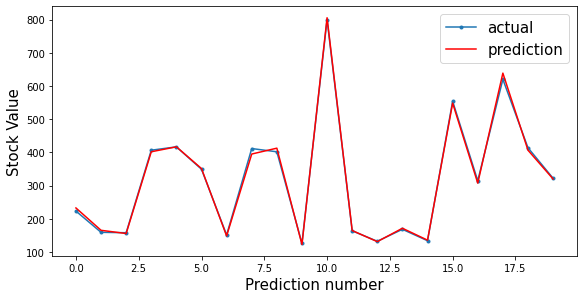

In [ ]:
high_test_predict = model1.predict(high_X_test)
prediction_plot(high_y_test[0:20],high_test_predict[0:20])

In [ ]:
def input_next_day(df,col='High'):
    arr = np.array(df[col])
    return arr[-1*lookback:]
    
    
    

[352.6  352.3  360.15 364.05 369.   373.9  366.2  370.   350.55 362.7
 362.7  362.65 369.5  374.65 375.9  376.   374.5  372.45 375.6  370.4
 369.   386.75 395.2  392.7  382.65 379.35 402.   404.7  413.   416.  ]


In [ ]:
df['High'].tail()

3215    379.35
3216    402.00
3217    404.70
3218    413.00
3219    416.00
Name: High, dtype: float64

In [ ]:
prediction_input = input_next_day(df)
predicted_stock_value = model1.predict(prediction_input.reshape(1,lookback))[0][0]

predicted_stock_value

410.2154

In [ ]:
def predicted_plot(prediction_input,predicted_value):
    plt.plot(df['Date'][-1*lookback:],prediction_input)
    plt.plot(prediction_date,predicted_value,marker="*")
    plt.show()

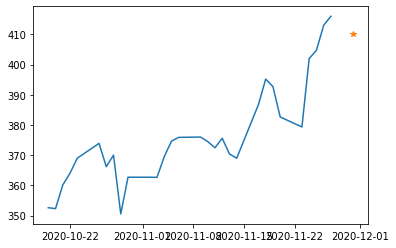

In [ ]:
predicted_plot(prediction_input,predicted_stock_value)

In [ ]:
df['Date'][0]

Timestamp('2007-11-27 00:00:00')

In [ ]:

prediction_date

Timestamp('2020-11-30 00:00:00')

In [ ]:
def create_model(layers=1 ,neurons=256):
    model=Sequential()

    model.add(Dense(500,activation='relu',input_shape=(lookback,)))

    for i in range(layers):
        model.add(Dense(neurons,activation='relu'))

    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
    return model

In [ ]:
model = KerasRegressor(build_fn=create_model,epochs=5,batch_size=16)

In [ ]:
params = dict(layers=[1,2,3,4,5],neurons=[5,25,50,100,150,200,250,300])

In [ ]:
random_search = RandomizedSearchCV(model,params,cv=KFold(3))

In [ ]:
random_search.fit(high_X_train,high_y_train)

Epoch 1/5
107/107 [==============================] - 1s 4ms/step - loss: 63248.7731 - mse: 63248.7731
Epoch 2/5
107/107 [==============================] - 0s 4ms/step - loss: 40052.5174 - mse: 40052.5174
Epoch 3/5
107/107 [==============================] - 0s 4ms/step - loss: 31043.2964 - mse: 31043.2964
Epoch 4/5
107/107 [==============================] - 0s 3ms/step - loss: 31018.1930 - mse: 31018.1930
Epoch 5/5
54/54 [==============================] - 0s 1ms/step - loss: 26501.6387 - mse: 26501.6387
Epoch 1/5
107/107 [==============================] - 1s 3ms/step - loss: 64758.5623 - mse: 64758.5623
Epoch 2/5
107/107 [==============================] - 0s 3ms/step - loss: 39269.0409 - mse: 39269.0409
Epoch 3/5
107/107 [==============================] - 0s 3ms/step - loss: 33450.5715 - mse: 33450.5715
Epoch 4/5
107/107 [==============================] - 0s 4ms/step - loss: 30512.4392 - mse: 30512.4392
Epoch 5/5
54/54 [==============================] - 0s 1ms/step - loss: 33093.4102 - 

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb16a3b5910>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'layers': [1, 2, 3, 4, 5],
                                        'neurons': [5, 25, 50, 100, 150, 200,
                                                    250, 300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
random_search.best_params_

{'layers': 1, 'neurons': 250}

In [ ]:
random_search.best_score_

-26916.990234375

In [ ]:
best_model = random_search.best_estimator_


In [ ]:
best_model.model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 500)               15500     
_________________________________________________________________
dense_131 (Dense)            (None, 250)               125250    
Total params: 140,750
Trainable params: 140,750
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_model.score(high_X_test,high_y_test)

40/40 [==============================] - 0s 2ms/step - loss: 28361.6738 - mse: 28361.6738


-28361.673828125

In [ ]:
best_model.model.save("/content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_model")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Colab Notebooks/Stock_Value_Prediction_Final_Year_Project/models/high_model/assets


In [ ]:
best_model.model.evaluate(high_X_test,high_y_test)

20/20 [==============================] - 0s 2ms/step - loss: 28361.6777 - mse: 28361.6777


[28361.677734375, 28361.677734375]